<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#1.-Global-EDA" data-toc-modified-id="1.-Global-EDA-2">1. Global EDA</a></span><ul class="toc-item"><li><span><a href="#1.1.-Raw-inputs-analysis" data-toc-modified-id="1.1.-Raw-inputs-analysis-2.1">1.1. Raw inputs analysis</a></span></li><li><span><a href="#1.2.-Target-analysis" data-toc-modified-id="1.2.-Target-analysis-2.2">1.2. Target analysis</a></span></li></ul></li><li><span><a href="#3.-Langage-pre-processing" data-toc-modified-id="3.-Langage-pre-processing-3">3. Langage pre-processing</a></span><ul class="toc-item"><li><span><a href="#3.1.-Exploration-and-text-processing-:-see-dedicated-Notebook" data-toc-modified-id="3.1.-Exploration-and-text-processing-:-see-dedicated-Notebook-3.1">3.1. Exploration and text processing : see dedicated Notebook</a></span></li><li><span><a href="#3.2.-Compute-tf-idf-matrix" data-toc-modified-id="3.2.-Compute-tf-idf-matrix-3.2">3.2. Compute tf-idf matrix</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-'raw'-tf-idf-matrix-(unprocessed-baseline)" data-toc-modified-id="The-'raw'-tf-idf-matrix-(unprocessed-baseline)-3.2.0.1">The 'raw' tf-idf matrix (unprocessed baseline)</a></span></li><li><span><a href="#After-preprocessing-tf-idf-matrix" data-toc-modified-id="After-preprocessing-tf-idf-matrix-3.2.0.2">After preprocessing tf-idf matrix</a></span></li><li><span><a href="#2D-t-sne-projections-of-products-by-tf-idf-coordinates" data-toc-modified-id="2D-t-sne-projections-of-products-by-tf-idf-coordinates-3.2.0.3">2D t-sne projections of products by tf-idf coordinates</a></span></li></ul></li></ul></li><li><span><a href="#3.3.-NMF-BoW-:-Non-negative-Matrix-Factorization" data-toc-modified-id="3.3.-NMF-BoW-:-Non-negative-Matrix-Factorization-3.3">3.3. NMF BoW : Non-negative Matrix Factorization</a></span></li><li><span><a href="#3.4-Use-coherence-score-to-study-&quot;best&quot;-topics-number" data-toc-modified-id="3.4-Use-coherence-score-to-study-&quot;best&quot;-topics-number-3.4">3.4 Use coherence score to study "best" topics number</a></span></li><li><span><a href="#3.5.-LDA-BoW-:-Latent-Dirichlet-Allocation" data-toc-modified-id="3.5.-LDA-BoW-:-Latent-Dirichlet-Allocation-3.5">3.5. LDA BoW : Latent Dirichlet Allocation</a></span></li></ul></li><li><span><a href="#4.-Image-pre-processing" data-toc-modified-id="4.-Image-pre-processing-4">4. Image pre-processing</a></span><ul class="toc-item"><li><span><a href="#4.1.-Exploration-and-image-processing-:-see-dedicated-Notebook" data-toc-modified-id="4.1.-Exploration-and-image-processing-:-see-dedicated-Notebook-4.1">4.1. Exploration and image processing : see dedicated Notebook</a></span></li><li><span><a href="#4.2.-SIFT-Bags-of-Visual-Words" data-toc-modified-id="4.2.-SIFT-Bags-of-Visual-Words-4.2">4.2. SIFT Bags of Visual Words</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Features-extraction" data-toc-modified-id="Features-extraction-4.2.0.1">Features extraction</a></span></li><li><span><a href="#Extract-descriptors" data-toc-modified-id="Extract-descriptors-4.2.0.2">Extract descriptors</a></span></li><li><span><a href="#All-descriptors-for-BoVW" data-toc-modified-id="All-descriptors-for-BoVW-4.2.0.3">All descriptors for BoVW</a></span></li><li><span><a href="#K-Means-to-group-Visual-Words-into-Bags-(Clusters)" data-toc-modified-id="K-Means-to-group-Visual-Words-into-Bags-(Clusters)-4.2.0.4">K-Means to group Visual Words into Bags (Clusters)</a></span></li><li><span><a href="#Create-histograms" data-toc-modified-id="Create-histograms-4.2.0.5">Create histograms</a></span></li><li><span><a href="#2D-t-sne-projections-of-products-by-BoVW-coordinates" data-toc-modified-id="2D-t-sne-projections-of-products-by-BoVW-coordinates-4.2.0.6">2D t-sne projections of products by BoVW coordinates</a></span></li><li><span><a href="#reduce-before-the-2D-visualization" data-toc-modified-id="reduce-before-the-2D-visualization-4.2.0.7">reduce before the 2D visualization</a></span></li><li><span><a href="#Alternate-features-with-500x500-resizing,-enhanced-contrast." data-toc-modified-id="Alternate-features-with-500x500-resizing,-enhanced-contrast.-4.2.0.8">Alternate features with 500x500 resizing, enhanced contrast.</a></span></li></ul></li></ul></li><li><span><a href="#4.4.-Alternate-approach-test-of-VGG-16-CNN-with-transfert-learning" data-toc-modified-id="4.4.-Alternate-approach-test-of-VGG-16-CNN-with-transfert-learning-4.3">4.4. Alternate approach test of VGG-16 CNN with transfert learning</a></span></li></ul></li><li><span><a href="#5.-Reduce-&amp;-Combine" data-toc-modified-id="5.-Reduce-&amp;-Combine-5">5. Reduce &amp; Combine</a></span></li><li><span><a href="#6.-Clustering" data-toc-modified-id="6.-Clustering-6">6. Clustering</a></span></li></ul></div>

Etienne Lardeur 2020 - P6 Project Data Scientist - OpenClassrooms

# Introduction

"Place de marché" wishes to launch its e-marketplace, where sellers offers to customers their products for purchase, providing a picture and details such as description.<br/>
Until now, any product is unreliabily attached manually to a category. <br/>
The purpose of this Project is to study an automated process to ensure the right attachment of any product to its category : a Classification Engine.<br/>  

- First step is to perform a global Exploratory Data Analysis of inputs and target, <br/>
- Second and third steps consist in dedicated Feature Engineering : the purpose is A. to select an adequate preprocessing for any {text, image} decribing each product, and 2. build Bags of Words / Bags of Visual Words, <br/>
- Forth step addresses the issue of dimension reduction of a combination of engineered features,
- Last step of the feasibility study consists in using a clustering method to provide an illustration, that will be used as a visual proof of concept of a classification engine's ability to group products of the same category.

In [3]:
%load_ext pycodestyle_magic
%flake8_on
# PEP8 tested

In [4]:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
import seaborn as sns
import operator
import time
import itertools
from operator import itemgetter
from collections import Counter
# get the path
import os
import os.path
# paths imutils
from imutils import paths
# opencv
import cv2
# scipy
from scipy import ndimage
from scipy.spatial import distance
# clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
# text processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import string
from string import digits
from string import punctuation
import re
# projections
from sklearn.manifold import TSNE
# decomposition
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
# transformer
from sklearn.preprocessing import StandardScaler
# image
# from PIL import Image
# gensim - coherence for topic size
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf

# 1. Global EDA

## 1.1. Raw inputs analysis

In [5]:
# read csv file (products description)
data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')

In [6]:
# content
data.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
202,70578f48cc96bbb60d040e08025e521d,2015-12-01 12:40:44 +0000,http://www.flipkart.com/earth-conscious-graphi...,Earth Conscious Graphic Print Baby Boy's Jumpsuit,"[""Baby Care >> Infant Wear >> Baby Boys' Cloth...",JUMEBKQJUZHCZHHM,625.0,625.0,70578f48cc96bbb60d040e08025e521d.jpg,False,Earth Conscious Graphic Print Baby Boy's Jumps...,No rating available,No rating available,NaN,"{""product_specification""=>[{""value""=>""Jumpsuit..."
281,db3e2eeb4fe90d4755f2911d661eae95,2016-04-24 18:34:50 +0000,http://www.flipkart.com/bhavya-velvet-sofa-cov...,Bhavya Velvet Sofa Cover,"[""Home Furnishing >> Living >> Sofa Covers >> ...",SLIEHET3CZ6XSDHP,3000.0,1999.0,db3e2eeb4fe90d4755f2911d661eae95.jpg,False,Bhavya Velvet Sofa Cover (Grey Pack of 10) Pri...,No rating available,No rating available,Bhavya,"{""product_specification""=>[{""key""=>""Pack of"", ..."
836,9a9402ad55d079c86c302521816b7b0e,2015-12-29 05:07:38 +0000,http://www.flipkart.com/rrp-alpha-x002-usb-led...,RRP Alpha X002 USB Led Light,"[""Computers >> Laptop Accessories >> USB Gadge...",USGEDSGQRARFSKZC,399.0,90.0,9a9402ad55d079c86c302521816b7b0e.jpg,False,RRP Alpha X002 USB Led Light (Pink)\r\n ...,No rating available,No rating available,RRP,"{""product_specification""=>[{""key""=>""Lamp Adjus..."


In [7]:
# size
data.shape

(1050, 15)

 Raw inputs to start study consists in a csv file and 1050 pictures. <br/>
 The dataset consists in 1050 entries and 15 features, with image containing the name of the picture file (pattern unique_id.jpg).

In [8]:
# possible primary keys (no duplicate)
no_duplicate_feat = [
    col for col in data.columns if len(data[col].unique()) == len(data[col])]
print("features without duplicate : {}".format(no_duplicate_feat))

features without duplicate : ['uniq_id', 'product_url', 'product_name', 'pid', 'image', 'description']


Among those features, we understang that 'uniq_id' & 'image' (as "uniq_id.jpg") are the same identifier, while 'pid' is an alternate id that links to 'product_url', built out of numerous features, including this 'pid'.

In [9]:
# missing data
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

While Brand name could help to determine product category, seems to be optional in this study and is missing 338 times.<br/>

In [10]:
# replace nan brand by '' (no brand name)
data['brand'] = data['brand'].fillna('')

In [11]:
# remove useless columns
data = data.drop(columns=[
    'uniq_id',
    'crawl_timestamp',
    'product_url',
    'pid',
    'retail_price',
    'discounted_price',
    'is_FK_Advantage_product',
    'product_rating',
    'overall_rating',
    'product_specifications',
])

In [12]:
# concatenate extended extd_description of a product
data['extd_description'] = data['brand'] + ' ' + data['product_name'] + ' ' + data['description']

Decisions: 
- to go on with image: we need to ensure consistency between 'image' and jpg pictures files in folder.
- to perform a first iteration of the feasibility study with 'description' only (consider 'extd_description' as an optional enhancement). 

In [13]:
# check link consistency (return 0 if ok)
# jpg_list : files in folders
jpg_list = os.listdir('Data/Images')
# image_list : filenames in dataset
image_list = data['image'].tolist()
len(set(image_list) - set(jpg_list))

0

Each product is described by a *.jpg file.

At this step, a minimal selection of input is : image & description, with target to catch within product_category_tree. 

## 1.2. Target analysis

Idea is to extract from the product_category_tree, a list of categories. We've to find the right decomposition's level and the corresponding list to work with. <br/>
Our interpretation of a right decomposition's level is the adequate balance of items available to learn from the dataset, i.e. :
- enough products available in the train set  <br/>
- the less dissimilarity between products of a given category <br/>

While the first criteria belongs to basic EDA, the second one is more complex and will be the result of text and image pre-processing.

In [14]:
# pick a category tree value
data.loc[0, 'product_category_tree']

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [15]:
# length of any category_tree value


def cat_tree_lenght(text):
    return len(text)


# Get the length
data['cat_tree_lenght'] = data['product_category_tree'].apply(cat_tree_lenght)
data['cat_tree_lenght'].describe()

count    1050.000000
mean       90.567619
std        35.782599
min        29.000000
25%        61.000000
50%        78.000000
75%       120.000000
max       187.000000
Name: cat_tree_lenght, dtype: float64

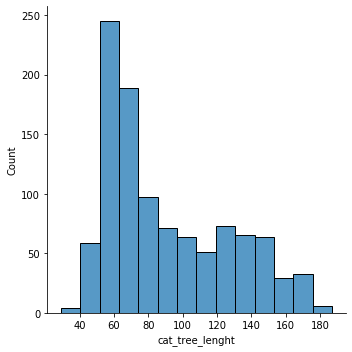

In [16]:
# Plot a hist of the word counts
sns.displot(
    x='cat_tree_lenght',
    data=data
)

The tree consists in category levels separated by ">>", and finally cut by "..."

In [17]:
# nb of decomposition's levels
data['tree_depth'] = data['product_category_tree'].apply(
    lambda x: len(x.split('>>')))
data['tree_depth'] = data['tree_depth'] - 1

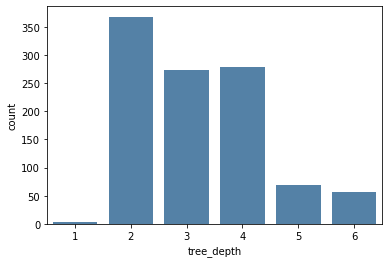

In [18]:
sns.countplot(
    x='tree_depth',
    data=data,
    color='steelblue'
)

In [19]:
# flaten category levels
cat_levels = []
for i in range(1, 8):
    cat_levels.append('cat_lvl_'+str(i))

In [20]:
# flaten category_tree as levels cat_lvl
for index in data.index:
    depth = len(
        data.loc[
            index, 'product_category_tree'].split("\"")[1].split(" >> "))
    for i, lvl in enumerate(cat_levels):
        if i + 1 <= depth:
            data.loc[
                index, lvl] = data.loc[
                index, 'product_category_tree'].split("\"")[1].split(" >> ")[i]

In [21]:
# remove unvalid categories (pseudo level names cutted by '...')
for lvl in cat_levels:
    mask = data[lvl].str.contains(r'\.\.\.', na=False)
    data[lvl][mask] = np.nan

C:\Users\etien\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
# check results
data.head(3)

,product_name,product_category_tree,image,description,brand,extd_description,cat_tree_lenght,tree_depth,cat_lvl_1,cat_lvl_2,cat_lvl_3,cat_lvl_4,cat_lvl_5,cat_lvl_6,cat_lvl_7
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Elegance,Elegance Elegance Polyester Multicolor Abstrac...,112,3,Home Furnishing,Curtains & Accessories,Curtains,NaN,NaN,NaN,NaN
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Sathiyas,Sathiyas Sathiyas Cotton Bath Towel Specificat...,137,4,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,NaN,NaN,NaN
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Eurospa,Eurospa Eurospa Cotton Terry Face Towel Set Ke...,136,4,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,NaN,NaN,NaN


In [23]:
# see how many categories are dividing each level
for lvl in cat_levels:
    print(lvl + ' is divided into %d sub-categories' % len(data[lvl].unique()))

cat_lvl_1 is divided into 7 sub-categories
cat_lvl_2 is divided into 62 sub-categories
cat_lvl_3 is divided into 239 sub-categories
cat_lvl_4 is divided into 318 sub-categories
cat_lvl_5 is divided into 217 sub-categories
cat_lvl_6 is divided into 96 sub-categories
cat_lvl_7 is divided into 51 sub-categories


Text(0.5, 1.02, 'Level 1 Prodcut Categories')

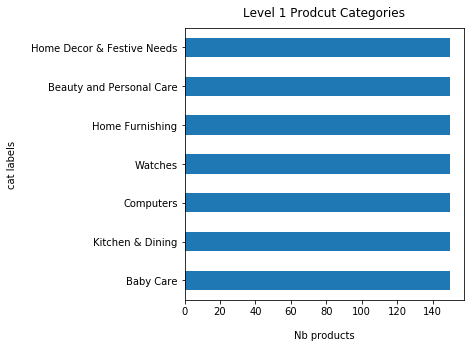

In [24]:
# observe first level
data['cat_lvl_1'].value_counts().plot(
    kind='barh',
    figsize=(5, 5)).invert_yaxis()
plt.xlabel('Nb products', labelpad=14)
plt.ylabel('cat labels', labelpad=14)
plt.title('Level 1 Prodcut Categories', y=1.02)

Each level 1 cat is populated by 1/7 of the products (150 out of 1050). <br/>
Next level comes with 62 labels, meaning we could expect an average of 17.5 products. Let's see how is this balanced.

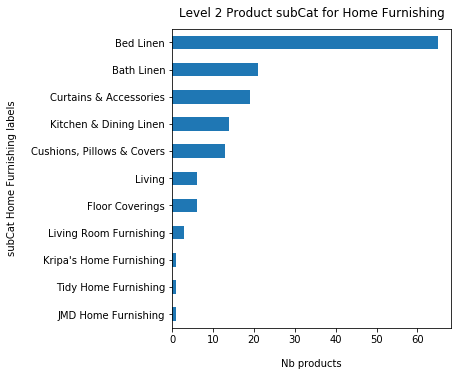

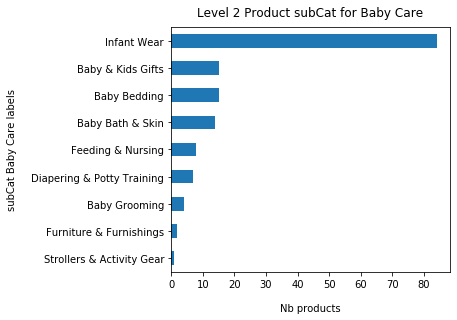

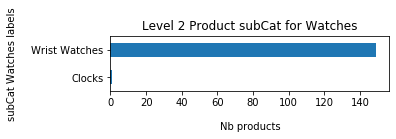

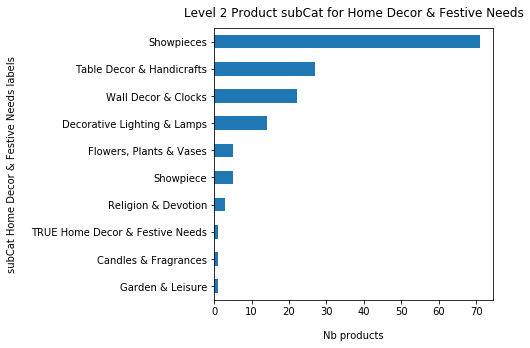

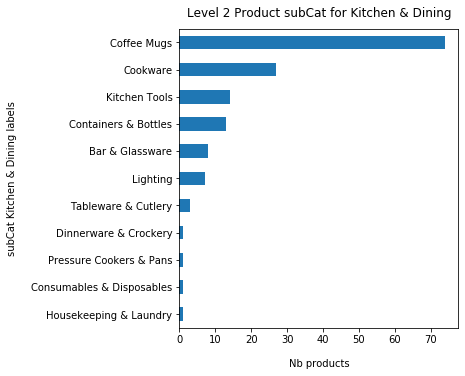

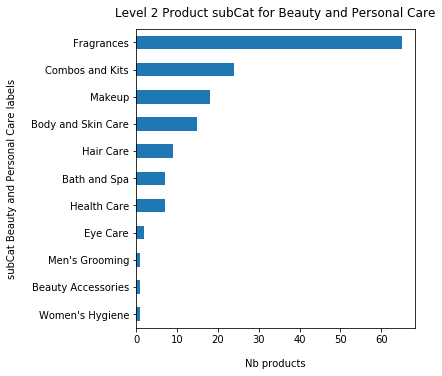

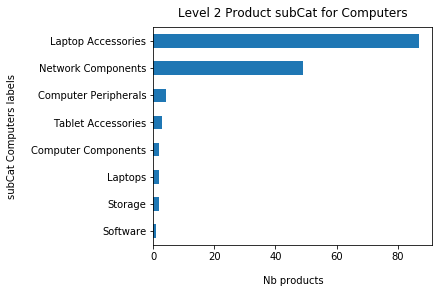

In [25]:
# observe second level
for cat in data['cat_lvl_1'].unique():
    subset = data[data['cat_lvl_1'] == cat]
    size = len(subset['cat_lvl_2'].unique()) / 2
    subset['cat_lvl_2'].value_counts().plot(
        kind='barh',
        figsize=(5, size)).invert_yaxis()
    plt.xlabel('Nb products', labelpad=14)
    plt.ylabel('subCat ' + str(cat) + ' labels', labelpad=14)
    plt.title('Level 2 Product subCat for ' + str(cat), y=1.02)
    plt.show()

This lead to a quite unbalanced division, meaning the sample has been built to study the first level of division.

We may expect “better results” if we ensure a better balance of products with big differences in their descriptions or shapes, due to increasing similarity across subcategories. <br/>
Nevertheless, this first study consists in assessing feasibility, based on the first level. <br/>
For instance, this would lead to study up to level 2 category, dropping those without enough images to learn from.

# 3. Langage pre-processing

## 3.1. Exploration and text processing : see dedicated Notebook

Please see separate "Explorations" Notebook : P6_01_Explorations_NB where are detailled the text EDA and the text process applied to get to an additionnal feature 'processed_description'.

In [26]:
# get the manual processed description from csv file (producess_descriptions)
processed_descriptions = pd.read_csv('Data/txt_processed_data.csv')
to_merge = processed_descriptions.filter(['image', 'processed_description'])
data = data.merge(to_merge,
                  how='left',
                  left_on=['image'],
                  right_on=['image'])

In [33]:
# apply in a dedicated feature
for index, row in data.iterrows():
    description = row['processed_description']
    corpus_desc = ''.join(description)
    data.at[index, 'corpus_description'] = corpus_desc
processed_corpus = data['corpus_description']

## 3.2. Compute tf-idf matrix
terms importance weighting within one description among all the possible descriptions :
- Term Frequency : how often the term occurs within any single description
- x Inverse Document Frequency : how rarely are the description where term occurs, accross any drescriptions (inverse log +1)

Note that we cant compute tf-idf with many parameters, and either on raw descriptions or to the already tokenized desriptions.

#### The 'raw' tf-idf matrix (unprocessed baseline)

In [28]:
# Raw means unprocessed description feature
raw_corpus = data['description']

In [29]:
# create tf-idf vectorizer
tfidf_matrix_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.85,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
raw_matrix = tfidf_matrix_vectorizer.fit_transform(raw_corpus)

# densify
raw_matrix_dense = raw_matrix.todense()
print(raw_matrix_dense.shape[1])

2442


In [30]:
# build vocab
raw_vocab = sorted(
    tfidf_matrix_vectorizer.vocabulary_.items(), key=operator.itemgetter(1))

# sorted list of words
raw_vocab = [word for (word, word_indice) in raw_vocab]

# create matrix
raw_tfidf_matrix = pd.DataFrame(
    raw_matrix_dense,
    columns=raw_vocab)

raw_tfidf_matrix.head()

,001,005,01,03,04,05tg,06,085,099,10,...,yes,york,young,youth,youthful,yuva,zero,zipper,zone,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.074495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04614,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.040360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.034580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### After preprocessing tf-idf matrix

In [35]:
# create tf-idf vectorizer
processed_tfidf_matrix_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.85,
    min_df=2,
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer to processed corpus
processed_matrix = processed_tfidf_matrix_vectorizer.fit_transform(
    processed_corpus)

# densify?
processed_matrix_dense = processed_matrix.todense()
print(processed_matrix_dense.shape[1])

# build vocab
vocab = sorted(
    processed_tfidf_matrix_vectorizer.vocabulary_.items(),
    key=operator.itemgetter(1)
)

# sorted list of words
vocab = [word for (word, word_indice) in vocab]

# create matrix
processed_tfidf_matrix = pd.DataFrame(processed_matrix_dense,
                                      columns=vocab)

processed_tfidf_matrix.head()

1242


,aa,abl,abod,absorb,abstract,ac,accent,accessori,accord,act,...,xx,yarn,year,yellow,yes,yl,ym,young,youth,zone
0,0.0,0.0,0.0,0.00000,0.198182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.199435,0.077523,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.07138,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.047800,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.039244,0.0,0.0,0.0,0.0,0.0


#### 2D t-sne projections of products by tf-idf coordinates

In [36]:
def tsne_proj(input, data_tf):
    tfidf_tsne = TSNE(n_components=2).fit_transform(input)
    tfidf_tsne_df = pd.DataFrame(
        tfidf_tsne,
        columns=['tsne 2D - One', 'tsne 2D - Two'])
    tfidf_proj = pd.merge(data_tf,
                          tfidf_tsne_df,
                          left_index=True,
                          right_index=True,
                          how='inner')
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='tsne 2D - One',
                    y='tsne 2D - Two',
                    hue='cat_lvl_1',
                    palette='Set2',
                    data=tfidf_proj)

In [37]:
# prepare cat_lvl_1 labels
data_tf = data.reset_index()[['cat_lvl_1']]

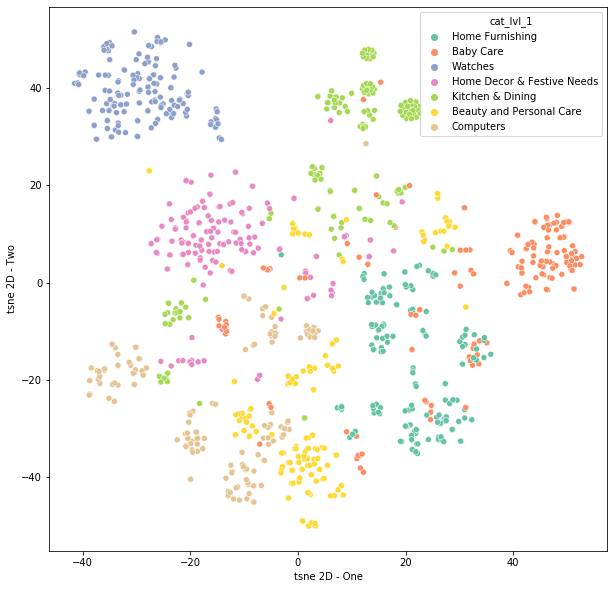

In [38]:
# see 2D t-sne projection with raw inputs
tsne_proj(raw_tfidf_matrix, data_tf)

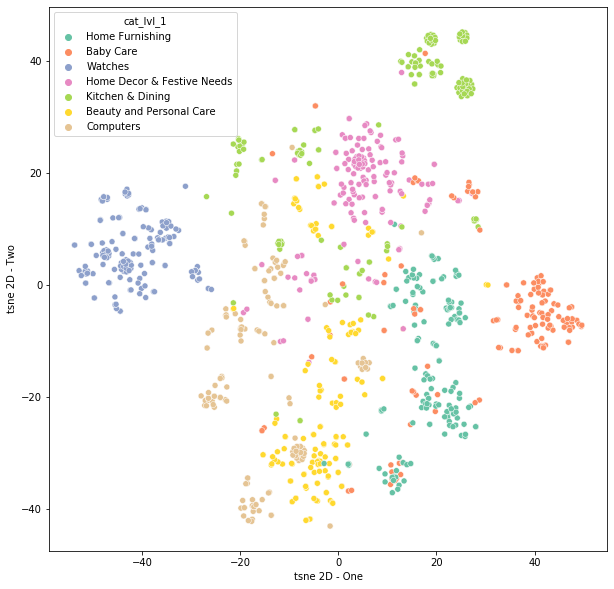

In [39]:
# see 2D t-sne projection with raw inputs
tsne_proj(processed_tfidf_matrix, data_tf)

In [197]:
'''
# store the results for further use
np.savetxt("data/features/raw_tfidf_results.csv", raw_tfidf_matrix)
'''

In [194]:
'''
# store the results for further use
np.savetxt("data/features/tfidf_results.csv", processed_tfidf_matrix)
'''

## 3.3. NMF BoW : Non-negative Matrix Factorization

The input in this case is a tf_idf matrix (dense or not seems ok). <br/>
We test raw_tfidf_matrix and processed_tfidf_matrix, from tfidf_matrix_vectorizer and processed_tfidf_matrix_vectorizer.

As a first step, we observe projections with as few topics as level 1st product's categories.

In [131]:
# keep same topics size than lvl 1 cat
no_topics = 7

# create NMF
nmf = NMF(
    n_components=no_topics,
    random_state=1,
    alpha=.1,
    l1_ratio=.5,
    init='nndsvd')

# Fitting the model
nmf.fit(raw_tfidf_matrix)


NMF(alpha=0.1, init='nndsvd', l1_ratio=0.5, n_components=7, random_state=1)

In [132]:
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)

In [133]:
# the 7 topics nmf way
topic_table(nmf, tfidf_matrix_vectorizer.get_feature_names(), 8)

,0,1,2,3,4,5,6
0,com,watch,baby,rockmantra,showpiece,cm,mug
1,flipkart,analog,girl,mug,cm,pack,coffee
2,cash,men,details,ceramic,prices,color,ceramic
3,genuine,discounts,fabric,stays,best,model,mugs
4,shipping,india,cotton,crafting,online,warranty,tea
5,delivery,great,dress,porcelain,30,features,perfect
6,products,women,boy,thrilling,guarantee,package,printland
7,free,sonata,sleeve,permanent,replacement,box,prithish


In [137]:
# nmf restults
nmf_result = nmf.transform(raw_tfidf_matrix)
nmf_result.shape

(1050, 7)

In [195]:
# quick look on best topics to introduce it in projections
nmf_result_df = pd.DataFrame(nmf_result)
nmf_result_df['Best_Topic'] = nmf_result_df.idxmax(axis=1)
nmf_result_df.sample(3)

,0,1,2,3,4,5,6,Best_Topic
855,0.006433,0.000000,0.0,0.0,0.046064,0.00032,0.0,4
390,0.082939,0.000283,0.0,0.0,0.014263,0.00000,0.0,0
545,0.007260,0.104806,0.0,0.0,0.000000,0.00000,0.0,1


Caution: best topic is only a way to catch the highest value in topic histogram, we only used it here to prefigure clustering, with a rough approximation that illustrates consistence of category / topics mapping.

In [196]:
def topics_tsne_proj(input, data_tf):
    model_df = pd.DataFrame(input)
    model_df['Best_Topic'] = model_df.idxmax(axis=1)
    model_tsne = TSNE(n_components=2).fit_transform(input)
    model_tsne_df = pd.DataFrame(
        model_tsne,
        columns=['tsne 2D - One', 'tsne 2D - Two'])
    model_proj = pd.merge(data_tf,
                          model_tsne_df,
                          left_index=True,
                          right_index=True,
                          how='inner')
    model_proj = pd.merge(model_proj,
                          model_df,
                          left_index=True,
                          right_index=True,
                          how='inner')
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='tsne 2D - One',
                    y='tsne 2D - Two',
                    hue='cat_lvl_1',
                    style='Best_Topic',
                    palette='Set2',
                    s=70,
                    data=model_proj)

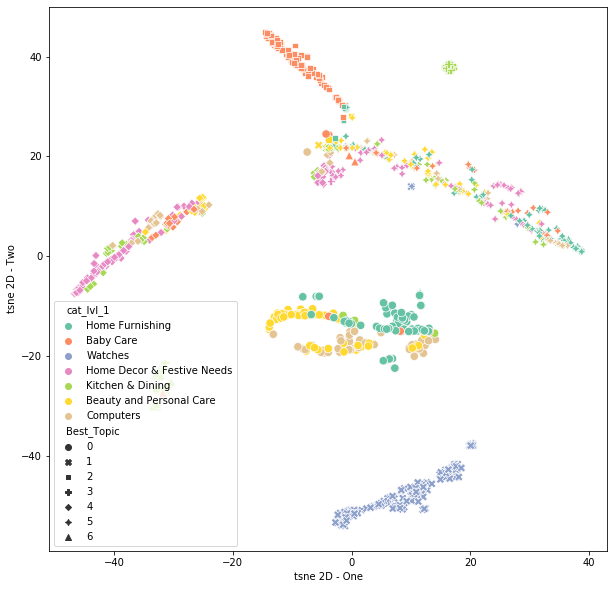

In [138]:
# nmf with raw td_idf
topics_tsne_proj(nmf_result, data_tf)

In [142]:
# now with processed matrix
nmf.fit(processed_tfidf_matrix)
# the 7 topics nmf way
topic_table(nmf, processed_tfidf_matrix_vectorizer.get_feature_names(), 8)

,0,1,2,3,4,5,6
0,flipkartcom,watch,showpiec,mug,babi,abstract,cm
1,set,men,cm,ceram,girl,singl,warranti
2,cotton,great,best,perfect,cotton,blanket,pack
3,router,flipkartcom,exot,gift,fabric,doubl,design
4,playboy,maxima,brass,coffe,dress,flipkartcom,color
5,cell,dial,statu,safe,boy,multicolor,inch
6,bath,strap,lord,microwav,neck,floral,cover
7,batteri,resist,decor,start,sleev,home,print


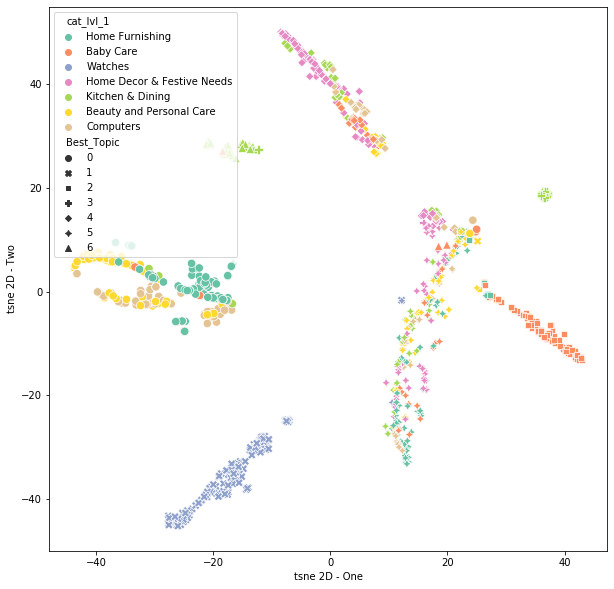

In [143]:
# nmf restults, processed
p_nmf_result = nmf.transform(processed_tfidf_matrix)
# nmf with processed td_idf
topics_tsne_proj(nmf_result, data_tf)

Both projections show that we've built a "carryall" topic, here topic "0", where numerous categories are represented. <br/>
Another trend shown here is a "categories & topics" mixed area, emphasizing the potential confusion.<br/>
Those observation stay the same despite upstream processing.<br/>
Even if we should only assess that processing step, according to final results, we've got here a bad intuition on its interest.<br/>

## 3.4 Use coherence score to study "best" topics number

At this step, we want to get an idea of how the number of topics chosen in NMF approach (or alternate technique as LDA) may affect a preview of expected results. <br/>
As stated by many study we compute coherence score to assess a topic number. Perplexity embedded in sklearn appears too mathematical and coherence is extrinsec while perplexity is intrinsec, leading to a coherence score that suits more to a "human" perception.

By "coherence" measurment, we search the degree of semantic similarity between high scoring words in the topic. This helps distinguishing between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. Among many measures, we choose the most popular "c_v", using normalized pointwise mutual information and cosine similarity... but we may have to select best according to final classifier results.

Here we introduce Gensim lib, which offers intersting parameters in terms of processing and corpus extraction. 

In [144]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = data['processed_description']

In [145]:
# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

In [146]:
len(dictionary)

1680

In [147]:
# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=2,
    no_above=0.9
)

In [148]:
len(dictionary)

1273

In [149]:
dictionary.token2id

{'abstract': 0,
 'ant': 1,
 'anti': 2,
 'apart': 3,
 'appeal': 4,
 'attent': 5,
 'beauti': 6,
 'bodi': 7,
 'box': 8,
 'brand': 9,
 'bright': 10,
 'bring': 11,
 'cm': 12,
 'color': 13,
 'contemporari': 14,
 'content': 15,
 'creat': 16,
 'curtain': 17,
 'design': 18,
 'door': 19,
 'draw': 20,
 'eleg': 21,
 'environ': 22,
 'even': 23,
 'eyelet': 24,
 'floral': 25,
 'general': 26,
 'good': 27,
 'height': 28,
 'high': 29,
 'home': 30,
 'id': 31,
 'key': 32,
 'length': 33,
 'light': 34,
 'look': 35,
 'materi': 36,
 'metal': 37,
 'model': 38,
 'morn': 39,
 'multicolor': 40,
 'number': 41,
 'pack': 42,
 'packag': 43,
 'polyest': 44,
 'qualiti': 45,
 'right': 46,
 'room': 47,
 'rs': 48,
 'set': 49,
 'smooth': 50,
 'sooth': 51,
 'special': 52,
 'style': 53,
 'sun': 54,
 'sure': 55,
 'thing': 56,
 'type': 57,
 'want': 58,
 'wish': 59,
 'world': 60,
 'wrinkl': 61,
 'bath': 62,
 'blue': 63,
 'cotton': 64,
 'ideal': 65,
 'inch': 66,
 'machin': 67,
 'men': 68,
 'red': 69,
 'self': 70,
 'size': 71,
 '

In [150]:
# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [156]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(1, 32, 3))

In [158]:
# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_scores.append(round(cm.get_coherence(), 5))

In [159]:
# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

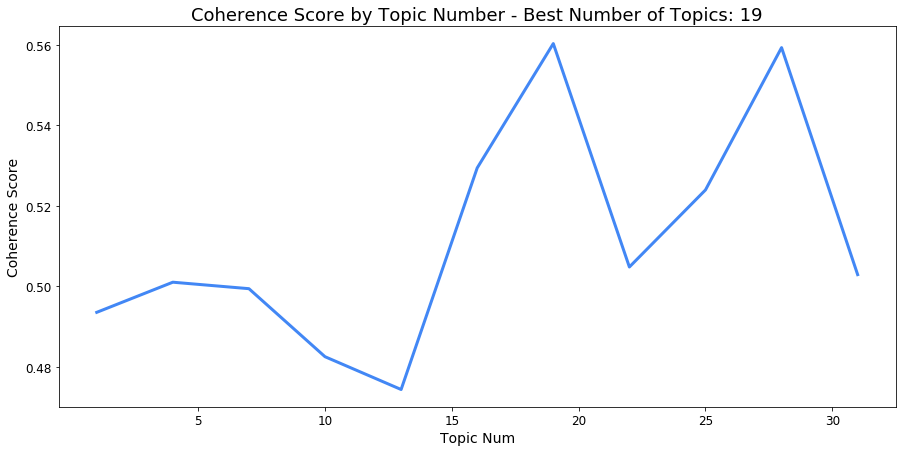

In [160]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number \
- Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

We observe that in this context (! Gensim's own process settings), we need to get to a larger number of topics, with almost 10 % more "coherence", but values beyond this threshold indicates a lack of stability.

We should proceed the same with Gensim's to get a baseline and comparison, but unfortunately, this imply switching to this new way to get results.

In [179]:
# increasing number of topics as adviced by alternate nmf coherence score
no_topics = 19

# create NMF
nmf_optim = NMF(
    n_components=no_topics,
    random_state=1,
    alpha=.1,
    l1_ratio=.5,
    init='nndsvd')

# Fitting the model
nmf_optim.fit(processed_tfidf_matrix)


NMF(alpha=0.1, init='nndsvd', l1_ratio=0.5, n_components=19, random_state=1)

In [180]:
# the 19 topics nmf way
topic_table(nmf_optim, processed_tfidf_matrix_vectorizer.get_feature_names(), 8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,flipkartcom,watch,showpiec,mug,babi,singl,skin,mug,cell,maxima,towel,led,cm,bring,router,best,men,doubl,warranti
1,set,great,cm,ceram,girl,abstract,mous,ceram,batteri,dial,bath,light,design,coffe,wireless,sticker,watch,blanket,adapt
2,playboy,time,best,stay,fabric,floral,pad,coffe,hp,strap,cotton,bulb,pack,perfect,flipkartcom,hard,great,abstract,power
3,offer,flipkartcom,exot,perman,dress,flipkartcom,print,perfect,pavilion,resist,soft,power,polyest,share,ac,hub,flipkartcom,flipkartcom,charger
4,pa,sonata,brass,porcelain,cotton,multicolor,warranti,ml,flipkartcom,water,face,flexibl,inch,forget,tplink,ceram,pc,multicolor,cover
5,ice,ym,statu,thrill,boy,shop,multicolor,teacoffe,compat,clasp,hand,portabl,eyelet,ink,band,vinyl,decker,geometr,product
6,vj,digit,lord,creation,neck,cover,set,coffeetea,dvt,round,terri,lamp,color,freedom,wifi,rice,digit,home,va
7,engag,sport,gift,start,sleev,maroon,remov,wardrob,dvea,case,linen,best,cover,quot,dual,inch,fanci,grey,output


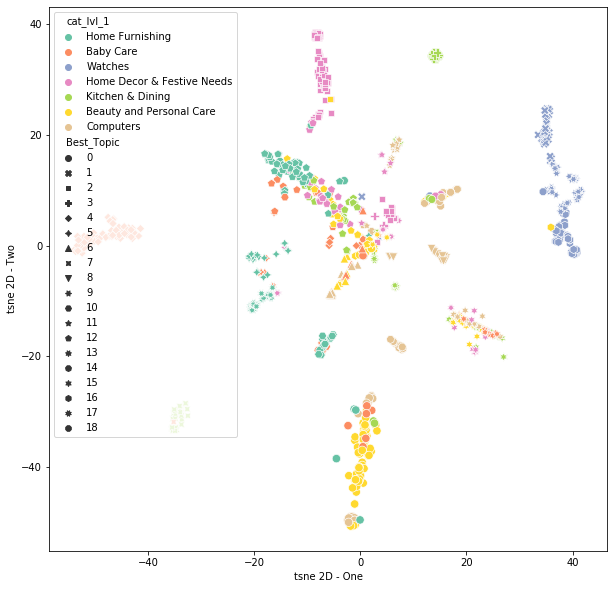

In [181]:
# nmf restults, processed
p_nmf_optim_result = nmf_optim.transform(processed_tfidf_matrix)
# nmf with processed td_idf
topics_tsne_proj(p_nmf_optim_result, data_tf)

Taking care of the fact that markers are not enough to provide good visuals, we see here that an increasing topic numbers lead to sparser coordinates, it seems reducing the size of the carryall topic, and split the "mixed area" into smaller group of products. There's still a high level of confusion for those near the center of the projection (with weak coordinates / topics membership). <br/>
In addition, we get now a split into subtopics : for instance with the clean group of "watches" category, with one product of beauty and personal care now in the same area. We'll need to keep an eye on it for further steps. <br/>

In [183]:
# store the results for further use
np.savetxt("data/features/nmf_optim_results.csv", p_nmf_optim_result)

## 3.5. LDA BoW : Latent Dirichlet Allocation

Alternate approach to build BoW from "simple" words matrix. After same tries, we simplify to one single restult with 19 topics & processed corpus.

In [186]:
# create count vectorizer
tf_vectorizer = CountVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8,
    min_df=2,
    ngram_range=(1, 1),
)

In [187]:
# Application of the tf-idf vectorizer au corpus processed
processed_tf = tf_vectorizer.fit_transform(processed_corpus)

In [188]:
# try with as much topics as first category levels
n_topics = 19
# Create LDA
lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=5,
    learning_method='online',
    learning_offset=50.,
    random_state=0)

In [189]:
# apply LDA
lda_processed_results = lda.fit_transform(processed_tf)

In [191]:
# observer topic table
topic_table(lda, tf_vectorizer.get_feature_names(), 7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,hair,smooth,bowl,light,mug,flipkartcom,batteri,babi,flipkartcom,polyest,print,copper,appl,gold,adapt,pizza,cm,qualiti,duvet
1,ml,lip,use,led,ceram,watch,warranti,cotton,hub,eyelet,warranti,jug,blanket,brass,power,cutter,showpiec,high,utmost
2,shampoo,balm,skin,best,perfect,men,cell,color,router,design,skin,glass,pro,home,warranti,gb,best,art,forward
3,type,intens,clean,flexibl,coffe,great,display,pack,wireless,cm,cm,craft,hako,beauti,charger,wheel,decor,steel,tire
4,ideal,cream,sticker,bulb,design,set,power,fabric,port,aroma,multicolor,water,mink,cm,product,steel,wooden,beauti,crash
5,brush,natur,appli,quilt,gift,dial,dial,general,extend,curtain,mous,time,warranti,glass,design,stainless,gift,batteri,exquisit
6,condition,pepper,bottl,soap,make,strap,hp,number,dlink,door,pad,capac,bazaar,box,fan,drive,frame,pot,spunk


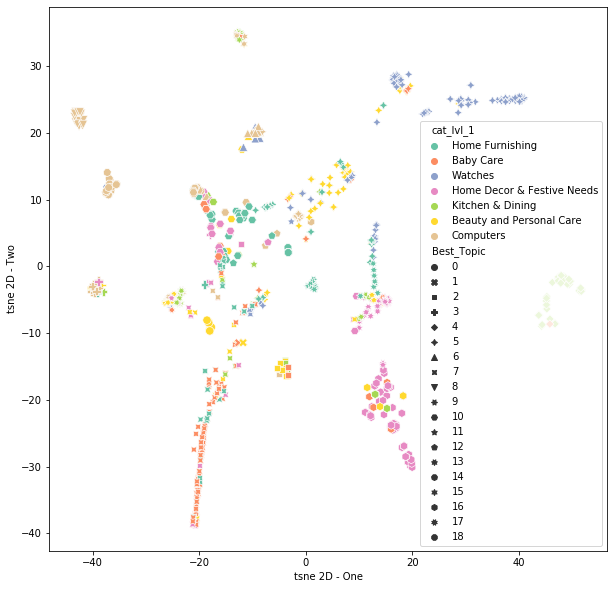

In [192]:
# lda projection with processed corpus
topics_tsne_proj(lda_processed_results, data_tf)

This alternate technique show a higher sparsity but in the meantime, we don't get as much "clean" coordinates similarities (e.g. considering the "Watches" category). <br/>
As stated earlier, we only may consider final results (i.e. classification), and those observation are only a way to assert and identify possible leverages to consider for further optimization.

In [193]:
# store the results for further use
np.savetxt("data/features/lda_optim_results.csv", lda_processed_results)

# 4. Image pre-processing

Warning : the global rendering of any processor tested below on samples pitcures does not ensure improvement of results. <br/>
Thoses experimentations shall be considedered as a way to understand the wide range of available processors. <br/>
Therefore, computer vision enhancement through processing will be assessed along the entire optimization process. <br/>
We had to catch the basics and explore qualitatively how a model build descriptors out of a picture depending its process.

## 4.1. Exploration and image processing : see dedicated Notebook

To summarize, the notebook details many processors, study impacts on SIFT keypoints extraction, and provide "organizer" functions that compute processors and fill folders with processed images for further use.

## 4.2. SIFT Bags of Visual Words

Here we proceed with tiny pictures with enhanced contrast. We'll simply try alternate processors through the same process.
We store each results into a dedicated file.

#### Features extraction

Please refer to dedicated Explorations_NB to get the whol pre-study about SIFT. Here we start from preped images folders and we keep only extract_features function to go on with features extraction.

In [223]:
# sift features extractor
sift = cv2.xfeatures2d.SIFT_create()

In [224]:
# With 50 descriptors
sift_50 = cv2.xfeatures2d.SIFT_create(nfeatures=50)

In [225]:
# extract features @path
def extract_features(img_path, model):

    # load image and convert it to grayscale
    # img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # load image
    img = cv2.imread(img_path)
    # detect key points and descriptors
    keypoints, descriptors = model.detectAndCompute(img, None)

    # returns keypoints and descriptors
    return keypoints, descriptors

#### Extract descriptors

In [160]:
# initializations
dir_name = 'data/SContrast_Images'
data.loc[:, 'descriptors'] = pd.Series(index=data.index)
data['descriptors'] = data['descriptors'].astype(object)

In [161]:
# extract descriptors
for index, row in data.iterrows():
    # get image name
    img_name = row['image']
    # create the path
    img_path = os.path.join(dir_name, img_name)
    # get the keypoints and descriptors of image
    img_keypoints, img_descriptors = extract_features(img_path, sift_50)
    # add descriptors
    data.at[index, 'descriptors'] = img_descriptors

#### All descriptors for BoVW

In [162]:
# gather any descriptors
descriptor_list = []
for index, row in data.iterrows():
    if 'descriptors' not in globals():
        # item to gather
        descriptors = row['descriptors']
    else:
        # to deal with the case where no descriptors were found
        if row['descriptors'] is not None:
            # concatenation of the descriptors
            descriptor_list.extend(row['descriptors'])

In [163]:
# descriptors count
len(descriptor_list)

52102

In [164]:
# convert to df
descriptor_list_df = pd.DataFrame(descriptor_list)

In [165]:
# check resulting shape
descriptor_list_df.shape

(52102, 128)

Only a few images returned less than 50 keypoints : we will iniate our work with this nfeatures max number and keep this as a keypoint to study deeply in later work.

#### K-Means to group Visual Words into Bags (Clusters)

In [166]:
# set the image vocab size
image_vocab_size = 150
# kmeans fit to the descriptor_list
kmeans = KMeans(n_clusters=image_vocab_size,
                random_state=42)
kmeans.fit(descriptor_list)

KMeans(n_clusters=150, random_state=42)

In [167]:
# unit test : get the keypoints and descriptors of an image
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)
img_keypoints, img_descriptors = extract_features(img_path, sift_50)
# key is to convert to list !
predict_kmeans = kmeans.predict(img_descriptors.tolist())
# build histogram
hist, bin_edges = np.histogram(predict_kmeans, bins=150)
# check lenght
len(hist)

150

In [168]:
hist

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 4, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

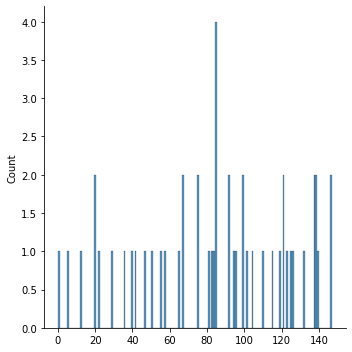

In [173]:
# Plot a hist of the word counts
sns.displot(predict_kmeans, bins=150)

In [171]:
predict_kmeans

array([ 50, 125,  75, 138, 140,  40, 138,  95, 115, 110,  36,  99,  67,
       119,  47, 132, 139,  92,  99,   5,  85,  65, 147,  55, 123,   0,
        85,  75,  92, 139,  67,  12,  29, 121,  20, 101,  22,  42,  83,
        20,  57,  96,  85, 104, 147,  85, 126,  84,  81, 121])

In [175]:
len(kmeans.cluster_centers_)

150

#### Create histograms

In [482]:
# get descriptors of any images, then get histogram and build feature_vetors
dir_name = 'data/SContrast_Images'
feature_vectors = []

for index, row in data.iterrows():
    # get image name
    img_name = row['image']
    # create the path
    img_path = os.path.join(dir_name, img_name)
    # get the keypoints and descriptors of image
    img_keypoints, img_descriptors = extract_features(img_path, sift_50)
    # get kmeans.predict
    predict_kmeans = kmeans.predict(img_descriptors.tolist())
    # compute histogram, with bin of clusters number
    hist, bin_edges = np.histogram(predict_kmeans, bins=150)
    # build the feature vector
    feature_vectors.append(hist)

#### 2D t-sne projections of products by BoVW coordinates

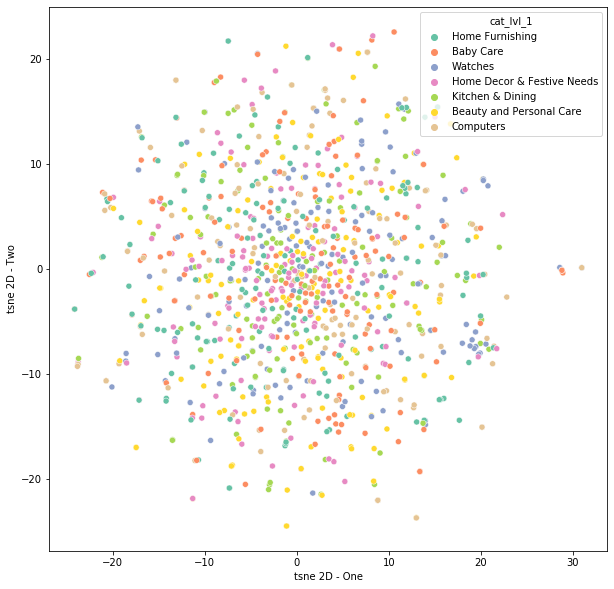

In [483]:
# build df out of resultings histograms
feature_vectors_df = pd.DataFrame(feature_vectors)
# see 2D t-sne projection with raw inputs
tsne_proj(feature_vectors_df, data_tf)

In [484]:
# store the results for further use
np.savetxt("data/features/stif_results.csv", feature_vectors_df)

#### reduce before the 2D visualization

In [468]:
# standard_scaler
std_feature_vectors_df = StandardScaler().fit_transform(feature_vectors_df)

In [469]:
# reduce (ACP)
# target a variance %
n_components = 0.8
pca = PCA(n_components=n_components)

In [470]:
pca_std_feature_vectors_df = pca.fit_transform(std_feature_vectors_df)

Text(0.5, 1.0, 'Cumulative Expl Variance Ratio (up to 80%) \n- text_feat_nmf -')

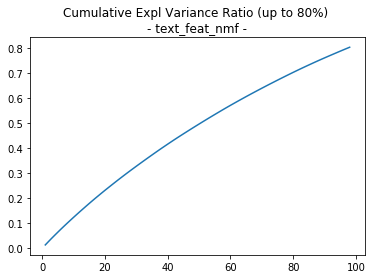

2:80: E501 line too long (80 > 79 characters)


In [471]:
# cumulative expl variance ratio
plt.plot(np.array([i for i in range(1, pca_std_feature_vectors_df.shape[1]+1)]),
         np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Expl Variance Ratio (up to 80%) \n- text_feat_nmf -')

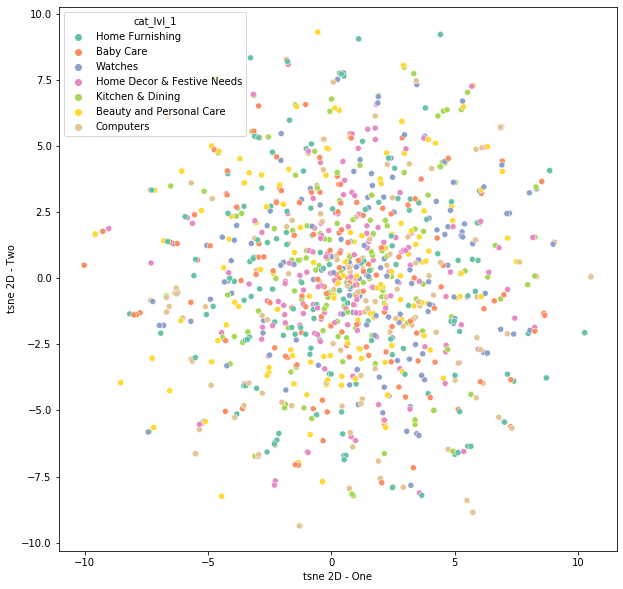

In [472]:
# see 2D t-sne projection with raw inputs
tsne_proj(pca_std_feature_vectors_df, data_tf)

#### Alternate features with 500x500 resizing, enhanced contrast.

In [228]:
# initializations
dir_name = 'data/MContrast_Images'
data.loc[:, 'descriptors'] = pd.Series(index=data.index)
data['descriptors'] = data['descriptors'].astype(object)

In [229]:
# extract descriptors
for index, row in data.iterrows():
    # get image name
    img_name = row['image']
    # create the path
    img_path = os.path.join(dir_name, img_name)
    # get the keypoints and descriptors of image
    img_keypoints, img_descriptors = extract_features(img_path, sift)
    # add descriptors
    data.at[index, 'descriptors'] = img_descriptors

In [230]:
# gather any descriptors
descriptor_list = []
for index, row in data.iterrows():
    if 'descriptors' not in globals():
        # item to gather
        descriptors = row['descriptors']
    else:
        # to deal with the case where no descriptors were found
        if row['descriptors'] is not None:
            # concatenation of the descriptors
            descriptor_list.extend(row['descriptors'])

In [231]:
# descriptors count
len(descriptor_list)

1092743

In [232]:
# convert to df
descriptor_list_df = pd.DataFrame(descriptor_list)

In [242]:
# empty scores list
kmeans_bovw_inertia_list = []
time_start = time.time()
for n in [150, 300, 550, 850, 1200]:
    # kmeans init and fit to the descriptor_list
    kmeans_bovw = MiniBatchKMeans(n_clusters=n)
    kmeans_bovw.fit(descriptor_list_df)
    kmeans_bovw_inertia_list.append(kmeans_bovw.inertia_)
print('kmeans MiniBatch BoVW sizes scan, elapsed time: {} seconds'.format(time.time()-time_start))

kmeans MiniBatch BoVW sizes scan, elapsed time: 563.4690599441528 seconds


In [243]:
# elbow method for bag of words size
kmeans_bovw_inertia_list

[84576673248.20888,
 78667074790.60123,
 74048176760.45323,
 70904649657.83536,
 68537591266.15828]

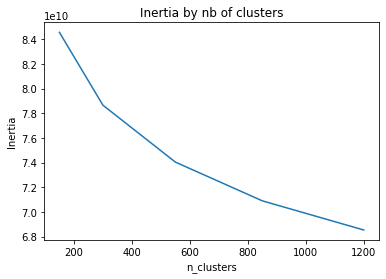

In [244]:
# elbow method for bag of words size
plt.xlabel("n_clusters")
plt.ylabel("Inertia")
plt.title("Inertia by nb of clusters")
plt.plot([150, 300, 550, 850, 1200], kmeans_bovw_inertia_list)

In [245]:
# set the image vocab size
image_vocab_size = 300
# kmeans fit to the descriptor_list
time_start = time.time()
kmeans_300 = MiniBatchKMeans(n_clusters=300)
kmeans_300.fit(descriptor_list)
print('kmeans MiniBatch BoVW "optim", elapsed time: {} seconds'.format(time.time()-time_start))

kmeans MiniBatch BoVW "optim", elapsed time: 85.87861657142639 seconds


In [246]:
# unit test : get the keypoints and descriptors of an image
img_name = data['image'].loc[85]
img_path = os.path.join('Data/Images', img_name)
img_keypoints, img_descriptors = extract_features(img_path, sift)
# key is to convert to list !
predict_kmeans_300 = kmeans_300.predict(img_descriptors.tolist())
# build histogram
hist, bin_edges = np.histogram(predict_kmeans_300, bins=300)
# check lenght
len(hist)

300

In [247]:
hist

array([11,  4, 11,  5, 10,  1,  6, 10,  3,  1,  1,  5,  0,  2,  3,  2,  4,
        6,  4,  2,  1,  3,  3,  9,  1,  2,  3,  2,  6,  5,  2,  3,  2,  4,
        4, 12,  1,  1,  4,  2,  4,  6,  8,  0,  5,  3,  7,  0,  3,  4, 19,
       11,  1,  4,  2,  0,  2,  3,  6,  5,  6, 13,  4,  0,  1,  8,  1,  1,
        3,  2, 15,  5,  9,  7,  1,  1,  8,  3,  9,  5,  6,  7,  6,  3,  5,
       15,  2, 13,  2,  1,  3,  6,  0,  7,  1,  1,  1,  6,  6,  1,  4,  2,
        4,  1,  4,  5,  5,  2,  2,  4,  2,  4,  5,  5,  5,  8,  1,  7,  8,
        3,  6,  1,  3,  9,  3,  5,  4,  4,  3, 14,  0,  5,  4,  2, 12,  4,
        5,  5,  6,  9,  0,  1,  4, 20,  5,  4,  7,  5,  6,  4,  6,  1,  7,
       27, 11,  7,  4,  3,  8,  4,  1,  0,  9,  2,  0,  3,  3,  8,  8,  6,
        5,  3,  5,  6, 13,  5,  6,  2,  3,  2,  4,  6,  4,  4,  3,  4,  5,
        1, 10,  5,  0,  2,  2,  5,  1,  7,  4,  3, 10,  4,  4,  1, 10,  5,
       10,  7, 12, 13,  1,  5,  7,  4,  9, 19,  0,  9,  5,  2,  1,  0,  3,
        6,  0,  4,  3,  1

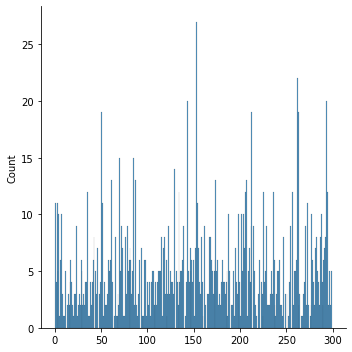

In [248]:
# Plot a hist of the word counts
sns.displot(predict_kmeans_300, bins=300)

In [249]:
# get descriptors of any images, then get histogram and build feature_vetors
dir_name = 'data/MContrast_Images'
feature_vectors_300 = []

for index, row in data.iterrows():
    # get image name
    img_name = row['image']
    # create the path
    img_path = os.path.join(dir_name, img_name)
    # get the keypoints and descriptors of image
    img_keypoints, img_descriptors = extract_features(img_path, sift)
    # get kmeans.predict
    predict_kmeans_300 = kmeans_300.predict(img_descriptors.tolist())
    # compute histogram, with bin of clusters number
    hist, bin_edges = np.histogram(predict_kmeans_300, bins=300)
    # build the feature vector
    feature_vectors_300.append(hist)

2:11: E222 multiple spaces after operator


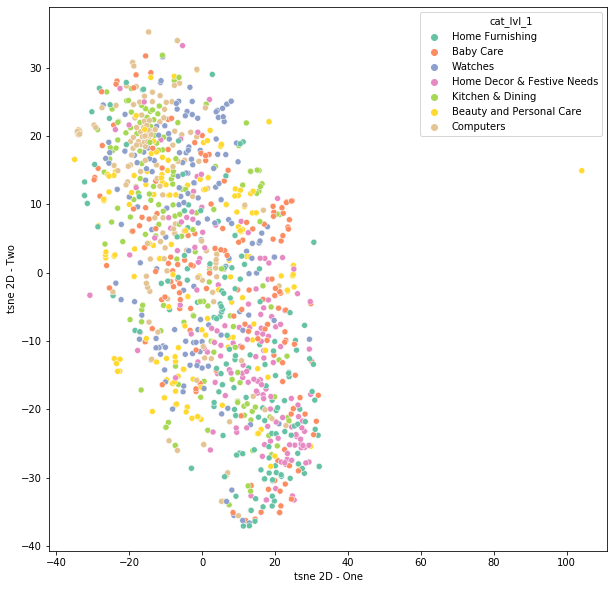

In [260]:
# build df out of resultings histograms
feature_vectors_300_df = pd.DataFrame(feature_vectors_300)
# see 2D t-sne projection with raw inputs
tsne_proj(feature_vectors_300_df, data_tf)

In [261]:
# store the results for further use
np.savetxt("data/features/stif_300bovw_results.csv", feature_vectors_300_df)

In [262]:
# standard_scaler
std_feature_vectors_300_df = StandardScaler().fit_transform(feature_vectors_300_df)

In [263]:
# reduce (ACP)
# target a variance %
n_components = 0.8
pca = PCA(n_components=n_components)

In [264]:
pca_std_feature_vectors_300_df = pca.fit_transform(feature_vectors_300_df)

Text(0.5, 1.0, 'Cumulative Expl Variance Ratio (up to 80%) \n- text_feat_nmf -')

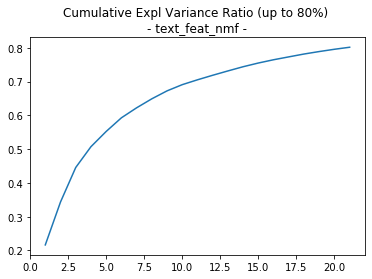

2:80: E501 line too long (84 > 79 characters)


In [265]:
# cumulative expl variance ratio
plt.plot(np.array([i for i in range(1, pca_std_feature_vectors_300_df.shape[1]+1)]),
         np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Expl Variance Ratio (up to 80%) \n- text_feat_nmf -')

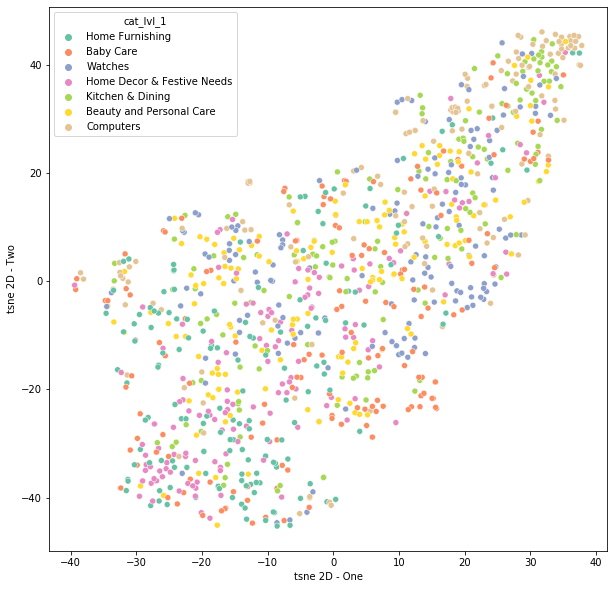

In [266]:
# see 2D t-sne projection with raw inputs
tsne_proj(pca_std_feature_vectors_300_df, data_tf)

## 4.4. Alternate approach test of VGG-16 CNN with transfert learning

Please refer to P6_03_CNN_by_VGG16.ipynb created on Colab, due to keras-tensorflow install issues. <br/>
We've tested how to get top classes of our product's dataset according to pre-trained NN model. <br/>
Unfortunately, no time left to fulfill this optional exploration. 

# 5. Reduce & Combine

In this section, we build the combination of text & image features. We reduce dimension to get balanced text/image features.

In [46]:
# get back features
nmf_optim = np.loadtxt(open('Data/Features/nmf_optim_results.csv'))
lda_optim = np.loadtxt(open('Data/Features/lda_optim_results.csv'))
raw_tfidf = np.loadtxt(open('Data/Features/raw_tfidf_results.csv'))
tfidf = np.loadtxt(open('Data/Features/tfidf_results.csv'))
sift = np.loadtxt(open('Data/Features/stif_results.csv'))
sift_optim = np.loadtxt(open('Data/Features/stif_300bovw_results.csv'))

In [47]:
# standardscale
std_nmf_optim = StandardScaler().fit_transform(nmf_optim)
std_lda_optim = StandardScaler().fit_transform(lda_optim)
std_raw_tfidf = StandardScaler().fit_transform(raw_tfidf)
std_tfidf = StandardScaler().fit_transform(tfidf)
std_sift = StandardScaler().fit_transform(sift)
std_sift_optim = StandardScaler().fit_transform(sift_optim)

In [48]:
# get dim of a PCA 80%
n_components = 0.8
pca = PCA(n_components=n_components)
# reduce each features
pca_std_nmf_optim = pca.fit_transform(std_nmf_optim)
pca_std_lda_optim = pca.fit_transform(std_lda_optim)
pca_std_raw_tfidf = pca.fit_transform(std_raw_tfidf)
pca_std_tfidf = pca.fit_transform(std_tfidf)
pca_std_sift = pca.fit_transform(std_sift)
pca_std_sift_optim = pca.fit_transform(std_sift_optim)

In [49]:
# how many features for each single technique
print('nb features of pca_std_nmf_optim: %d' % pca_std_nmf_optim.shape[1])
print('nb features of pca_std_lda_optim: %d' % pca_std_lda_optim.shape[1])
print('nb features of pca_std_raw_tfidf: %d' % pca_std_raw_tfidf.shape[1])
print('nb features of pca_std_tfidf: %d' % pca_std_tfidf.shape[1])
print('nb features of pca_std_sift: %d' % pca_std_sift.shape[1])
print('nb features of pca_std_sift_optim: %d' % pca_std_sift_optim.shape[1])

nb features of pca_std_nmf_optim: 14
nb features of pca_std_lda_optim: 14
nb features of pca_std_raw_tfidf: 343
nb features of pca_std_tfidf: 276
nb features of pca_std_sift: 98
nb features of pca_std_sift_optim: 72


In [ ]:
# set same size for txt & img features
# except raw tf-idf and tf-idf

In [106]:
print('min value of pca_std_nmf_optim is: %f' % np.min(pca_std_nmf_optim))
print('min value of pca_std_lda_optim is: %f' % np.min(pca_std_lda_optim))
print('min value of pca_std_sift is: %f' % np.min(pca_std_sift))
print('min value of pca_std_sift_optim is: %f' % np.min(pca_std_sift_optim))

min value of pca_std_nmf_optim is: -5.612444
min value of pca_std_lda_optim is: -6.491023
min value of pca_std_sift is: -7.439858
min value of pca_std_sift_optim is: -9.197328


In [107]:
# offset by min neg value
offset_pca_std_nmf_optim = pca_std_nmf_optim + abs(np.min(pca_std_nmf_optim))
offset_pca_std_lda_optim = pca_std_nmf_optim + abs(np.min(pca_std_lda_optim))
offset_pca_std_sift = pca_std_nmf_optim + abs(np.min(pca_std_sift))
offset_pca_std_sift_optim = pca_std_nmf_optim + abs(np.min(pca_std_sift_optim))

In [118]:
# nmf to same dim
nmf_7 = NMF(
    n_components=7,
    random_state=1,
    init='nndsvd',
    max_iter=10000)

In [119]:
# reduce each features
nmf_7_offset_pca_std_nmf_optim = nmf_7.fit_transform(offset_pca_std_nmf_optim)
nmf_7_offset_pca_std_lda_optim = nmf_7.fit_transform(offset_pca_std_lda_optim)
nmf_7_offset_pca_std_sift = nmf_7.fit_transform(offset_pca_std_sift)
nmf_7_offset_pca_std_sift_optim = nmf_7.fit_transform(offset_pca_std_sift_optim)

In [121]:
# nmf to txt dim
nmf_14 = NMF(
    n_components=14,
    random_state=1,
    init='nndsvd',
    max_iter=10000)

In [122]:
# adjust to txt dim features
nmf_14_offset_pca_std_sift = nmf_14.fit_transform(offset_pca_std_sift)
nmf_14_offset_pca_std_sift_optim = nmf_14.fit_transform(offset_pca_std_sift_optim)

# 6. Clustering

In this section, we compute 7 clusters and assess the clustering through ARI calculation. 

In [90]:
# build combinations of features with itertools

text_features = {'None': None,
                 'nmf_optim': pca_std_nmf_optim,
                 'lda_optim': pca_std_lda_optim,
                 'raw_tfidf': pca_std_raw_tfidf,
                 'tfidf': pca_std_tfidf}
img_features = {'None': None,
                'sift': pca_std_sift,
                'sift_optim': pca_std_sift_optim}

In [120]:
# build combinations of features - same size with itertools

red_text_features = {'None': None,
                     'red_nmf_optim': nmf_7_offset_pca_std_nmf_optim,
                     'red_lda_optim': nmf_7_offset_pca_std_lda_optim}
red_img_features = {'None': None,
                    'red_sift': nmf_7_offset_pca_std_sift,
                    'red_sift_optim': nmf_7_offset_pca_std_sift_optim}

In [135]:
# build combinations with img features adjusted to txt features size

adj_text_features = {'None': None,
                     'nmf_optim': pca_std_nmf_optim,
                     'lda_optim': pca_std_lda_optim}

adj_img_features = {'None': None,
                    'adj_sift': nmf_14_offset_pca_std_sift,
                    'adj_sift_optim': nmf_14_offset_pca_std_sift_optim}


In [124]:
def combine_and_cluster(text_features, img_features):
    # temp features dataframe
    features_to_clust = pd.DataFrame()
    # store results
    results = pd.DataFrame()
    # target to evaluate clustering with ARI
    target = data['cat_lvl_1']
    # define clusterer
    kmeans = KMeans(n_clusters=7)

    # loop over combinations
    # text as dictionary dim [0] of product, image as dim[1]
    for features in itertools.product(text_features, img_features):
        if (features[0] != 'None') or (features[1] != 'None'):
            if features[0] == 'None':
                name_iter = features[1]
                features_to_clust = img_features[features[1]]
            elif features[1] == 'None':
                name_iter = features[0]
                features_to_clust = text_features[features[0]]
            else:
                name_iter = features[0] + '+' + features[1]
                features_to_clust = np.concatenate(
                    (text_features[features[0]],
                     img_features[features[1]]),
                    axis=1)
            # fit and get labels
            kmeans.fit(features_to_clust)
            # store result
            results.loc[name_iter, 'ARI'] = adjusted_rand_score(
                target,
                kmeans.labels_)
    return results

In [125]:
# raw results with various sized features
raw_results = combine_and_cluster(text_features, img_features)

In [ ]:

Simple, just use .set_color

>>> barlist=plt.bar([1,2,3,4], [1,2,3,4])
>>> barlist[0].set_color('r')
>>> plt.show()

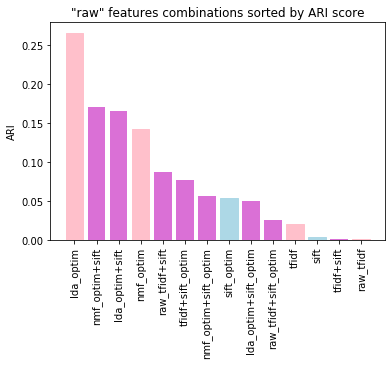

In [172]:
# plotting results
raw_results = raw_results.sort_values(by='ARI', ascending=False)
barlist = plt.bar(
    np.arange(len(raw_results)),
    raw_results['ARI'],
    color='orchid')
plt.ylabel('ARI')
plt.title('"raw" features combinations sorted by ARI score')
plt.xticks(np.arange(len(raw_results)), raw_results.index)
plt.xticks(rotation='90', horizontalalignment="center")
# for nice plot - remove or adjust
barlist[0].set_color('pink')
barlist[3].set_color('pink')
barlist[7].set_color('lightblue')
barlist[10].set_color('pink')
barlist[11].set_color('lightblue')
barlist[13].set_color('pink')
plt.show()

In [127]:
# results with same features size reduce by half
red_results = combine_and_cluster(red_text_features, red_img_features)

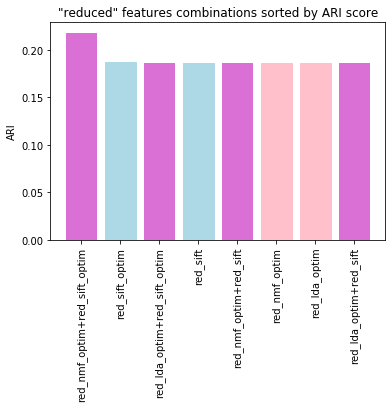

In [168]:
# plotting results
red_results = red_results.sort_values(by='ARI', ascending=False)
barlist = plt.bar(
    np.arange(len(red_results)),
    red_results['ARI'],
    color='orchid')
plt.ylabel('ARI')
plt.title('"reduced" features combinations sorted by ARI score')
plt.xticks(np.arange(len(red_results)), red_results.index)
plt.xticks(rotation='90', horizontalalignment="center")
# for nice plot - remove or adjust
barlist[1].set_color('lightblue')
barlist[3].set_color('lightblue')
barlist[5].set_color('pink')
barlist[6].set_color('pink')
plt.show()

In [136]:
# results with img features size adjusted to txt features size
adj_results = combine_and_cluster(adj_text_features, adj_img_features)

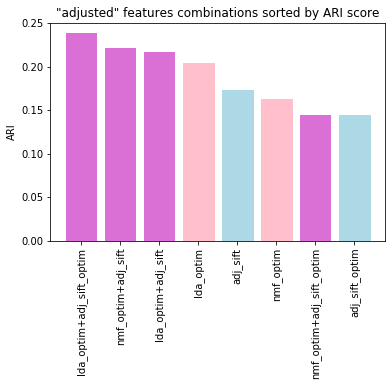

In [169]:
# plotting results
adj_results = adj_results.sort_values(by='ARI', ascending=False)
barlist = plt.bar(
    np.arange(len(adj_results)),
    adj_results['ARI'],
    color='orchid')
plt.ylabel('ARI')
plt.title('"adjusted" features combinations sorted by ARI score')
plt.xticks(np.arange(len(adj_results)), adj_results.index)
plt.xticks(rotation='90', horizontalalignment="center")
# for nice plot - remove or adjust
barlist[3].set_color('pink')
barlist[4].set_color('lightblue')
barlist[5].set_color('pink')
barlist[7].set_color('lightblue')
plt.show()

In [143]:
# build the "best" result
show_features_to_clust = np.concatenate(
    (adj_text_features['lda_optim'],
     adj_img_features['adj_sift_optim']),
    axis=1)

In [144]:
# clusters
kmeans.fit(show_features_to_clust)

KMeans(n_clusters=7)

In [145]:
def clusters_tsne_proj(input, labels, data_tf):
    data_tf['clusters'] = labels
    model_tsne = TSNE(n_components=2).fit_transform(input)
    model_tsne_df = pd.DataFrame(
        model_tsne,
        columns=['tsne 2D - One', 'tsne 2D - Two'])
    model_proj = pd.merge(data_tf,
                          model_tsne_df,
                          left_index=True,
                          right_index=True,
                          how='inner')
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='tsne 2D - One',
                    y='tsne 2D - Two',
                    hue='cat_lvl_1',
                    style='clusters',
                    palette='Set2',
                    s=70,
                    data=model_proj)

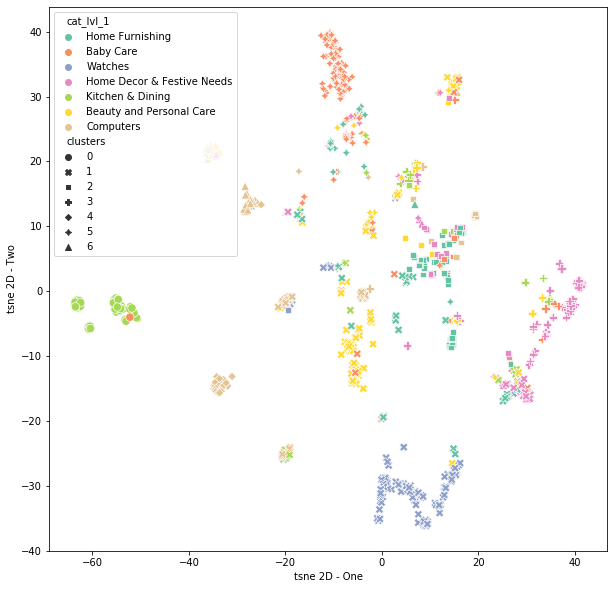

In [146]:
clusters_tsne_proj(show_features_to_clust, kmeans.labels_, data_tf)

In [147]:
# display feature contributions along principal components
# compute tab
ct = pd.crosstab(data['cat_lvl_1'], kmeans.labels_)

(7.0, 0.0)

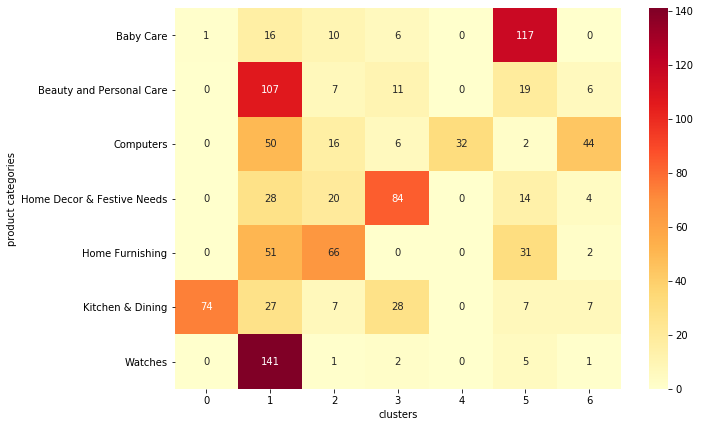

In [148]:
# heatmap
plt.figure(figsize=(10, 7))
ax = sns.heatmap(ct, annot=True, fmt='g', cmap='YlOrRd')
ax.set_xlabel('clusters')
ax.set_ylabel('product categories')

# fix a displaying problem
ax.set_ylim(ax.get_ylim()[0] + 0.5, ax.get_ylim()[1]-0.5)

In [176]:
# few qualitative observations
data['cluster_labels'] = kmeans.labels_

Text(0.5, 1.0, 'Cluster size')

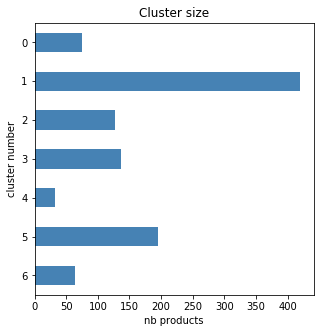

In [186]:
# cluster's balance
data['cluster_labels'].value_counts(sort=False).plot(
    kind='barh',
    color='steelblue',
    figsize=(5, 5)).invert_yaxis()
plt.xlabel('nb products')
plt.ylabel('cluster number')
plt.title('Cluster size')

We catch the tiniest clusters, which carries only products of one category. <br/>
Then we provide an overview of its content digging deeper into cats.

In [187]:
# build dfs
Cluster_0 = data[data['cluster_labels'] == 0]
Cluster_1 = data[data['cluster_labels'] == 1]
Cluster_2 = data[data['cluster_labels'] == 2]
Cluster_3 = data[data['cluster_labels'] == 3]
Cluster_4 = data[data['cluster_labels'] == 4]
Cluster_5 = data[data['cluster_labels'] == 5]
Cluster_6 = data[data['cluster_labels'] == 6]

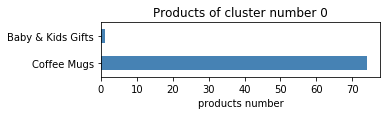

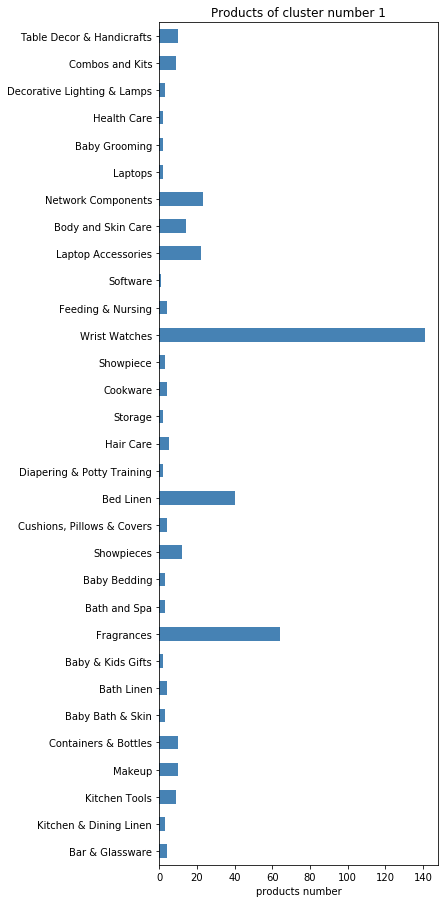

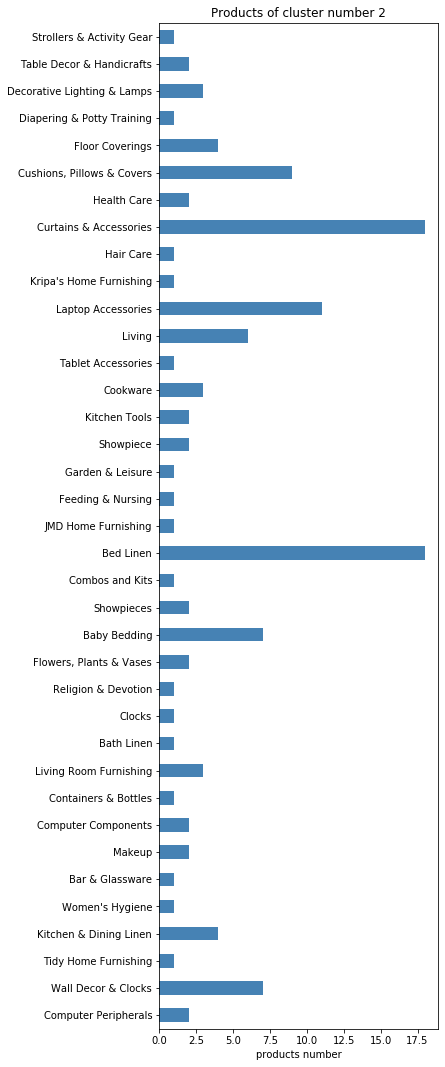

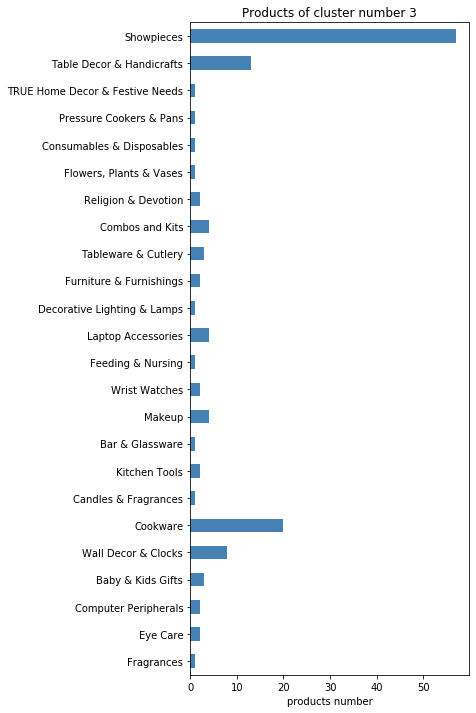

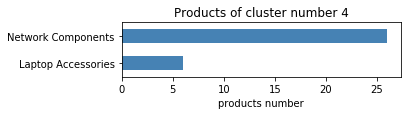

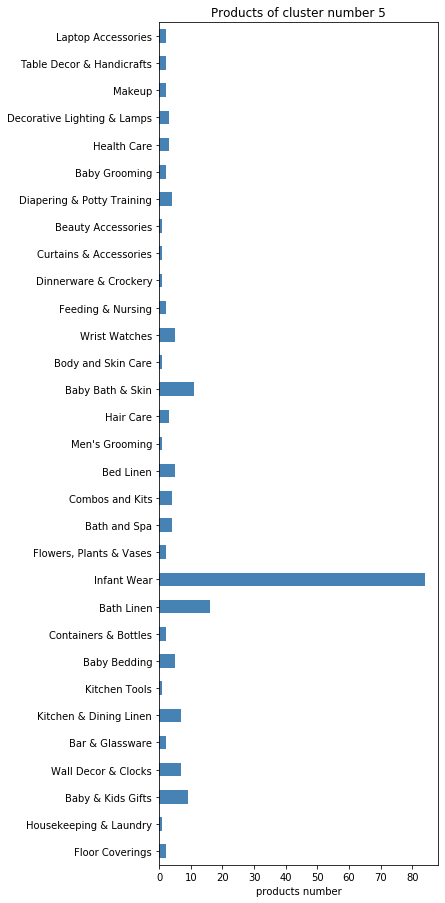

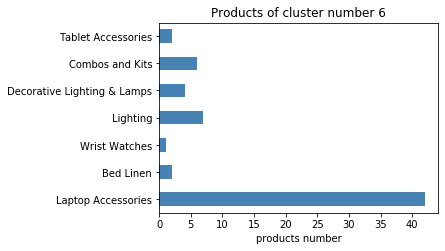

In [205]:
# overview of "cat level 2" for each clusters
for i in range(0, 7):
    df_clust = data[data['cluster_labels'] == i]
    hsize = len(df_clust['cat_lvl_2'].unique()) / 2
    df_clust['cat_lvl_2'].value_counts(sort=False).plot(
        kind='barh',
        color='steelblue',
        figsize=(5, hsize))
    plt.xlabel('nb products')
    plt.xlabel('products number')
    plt.title('Products of cluster number ' + str(i))
    plt.show()

In [207]:
# extract a sample to illustrate the study
Cluster_0[Cluster_0['cat_lvl_2'] != 'Coffee Mugs']

,product_name,product_category_tree,image,description,brand,extd_description,cat_tree_lenght,tree_depth,cat_lvl_1,cat_lvl_2,cat_lvl_3,cat_lvl_4,cat_lvl_5,cat_lvl_6,cat_lvl_7,processed_description,corpus_description,cluster_labels
1004,Doraemon Gift Family Ceramic Coffee Mug Multic...,"[""Baby Care >> Baby & Kids Gifts >> Decoration...",6325bf868b9040a0599f257aba42e9e0.jpg,Specifications of Doraemon Gift Family Ceramic...,Doraemon Gift Family Ceramic Coffee Mug,Doraemon Gift Family Ceramic Coffee Mug Doraem...,159,4,Baby Care,Baby & Kids Gifts,Decorations,Doraemon Gift Family Ceramic Coffee Mug Decora...,NaN,NaN,NaN,"['gift', 'famili', 'ceram', 'coffe', 'mug', 'm...","['gift', 'famili', 'ceram', 'coffe', 'mug', 'm...",0


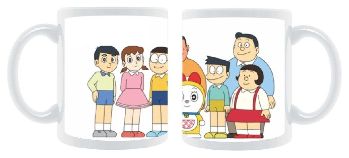

In [210]:
# show product
# build image file path from data['image']
img_name = data['image'][1004]
img_path = os.path.join('Data/Images', img_name)

# read and show
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)